# Final project exploratory notebook

## 1. Exploring the dataset

In [50]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Step 1: Load and clean the dataset

In [51]:
# Load the dataset with 'ISO-8859-1' encoding
df = pd.read_csv('spotify-2023.csv', encoding='ISO-8859-1')

# Drop rows with missing values in any column
df = df.dropna()
df = df[df['track_name'] != 'Love Grows (Where My Rosemary Goes)'] # Defective line with wrong format


# Display the first few rows after dropping NaNs
print("Data preview after dropping NaNs:")
print(df.head())

# Check for any missing values to confirm
print("Missing values after dropping rows with NaNs:")
print(df.isnull().sum())

Data preview after dropping NaNs:
                            track_name       artist_name  artist_count  \
0  Seven (feat. Latto) (Explicit Ver.)  Latto, Jung Kook             2   
1                                 LALA       Myke Towers             1   
2                              vampire    Olivia Rodrigo             1   
3                         Cruel Summer      Taylor Swift             1   
4                       WHERE SHE GOES         Bad Bunny             1   

   released_year  released_month  released_day  in_spotify_playlists  \
0           2023               7            14                   553   
1           2023               3            23                  1474   
2           2023               6            30                  1397   
3           2019               8            23                  7858   
4           2023               5            18                  3133   

   in_spotify_charts    streams  in_apple_playlists  ...  bpm key   mode  \
0           

### Step 2: Examine the Fields and Columns

In [52]:
# Display column names
print("Columns in the dataset:")
print(df.columns)

# Check for missing values in the dataset
print("\nMissing values:")
print(df.isnull().sum())

# Get the data types of each column
print("\nData types of the columns:")
print(df.dtypes)

# Get basic statistics for numerical columns
print("\nBasic Statistics:")
print(df.describe())


Columns in the dataset:
Index(['track_name', 'artist_name', 'artist_count', 'released_year',
       'released_month', 'released_day', 'in_spotify_playlists',
       'in_spotify_charts', 'streams', 'in_apple_playlists', 'in_apple_charts',
       'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts', 'bpm',
       'key', 'mode', 'danceability_%', 'valence_%', 'energy_%',
       'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%'],
      dtype='object')

Missing values:
track_name              0
artist_name             0
artist_count            0
released_year           0
released_month          0
released_day            0
in_spotify_playlists    0
in_spotify_charts       0
streams                 0
in_apple_playlists      0
in_apple_charts         0
in_deezer_playlists     0
in_deezer_charts        0
in_shazam_charts        0
bpm                     0
key                     0
mode                    0
danceability_%          0
valence_%               0
energy_%

### Step 3: Filter Songs from 2006 and Ahead

This is done because 2006 is the year when spotify was founded, and we want to analyze enteries, so this seems like the best way of action.

In [53]:
# Convert 'released_year' to numeric (if it's not already) and handle any errors
df['released_year'] = pd.to_numeric(df['released_year'], errors='coerce')

# Filter the dataset to include only songs released from 2006 and onwards
df_filtered = df[df['released_year'] >= 2006]

# Verify the result to make sure the filtering is correct
print(f"Minimum year in df_filtered: {df_filtered['released_year'].min()}")  # Should be 2006 or later

# Display the first few rows of the filtered dataset
df_filtered.head()

Minimum year in df_filtered: 2008


,track_name,artist_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


### Step 4: Add interesting columns from static analysis

In [54]:
# Add a column 'Number of Characters' to the dataset
df_filtered['number_characters'] = df_filtered['track_name'].apply(len)
df_filtered.head()

C:\Users\Bruno\AppData\Local\Temp\ipykernel_26060\1129089624.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['number_characters'] = df_filtered['track_name'].apply(len)


,track_name,artist_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,number_characters
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,B,Major,80,89,83,31,0,8,4,35
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,C#,Major,71,61,74,7,0,10,4,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,F,Major,51,32,53,17,0,31,6,7
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,A,Major,55,58,72,11,0,11,15,12
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,A,Minor,65,23,80,14,63,11,6,14


### Step 5: Correlation Matrix

'streams' is not in the list of numerical columns. Checking the column type...
'streams' is now part of the numerical columns.


C:\Users\Bruno\AppData\Local\Temp\ipykernel_26060\1808737563.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['streams'] = pd.to_numeric(df_filtered['streams'], errors='coerce')  # Convert to numeric and handle errors


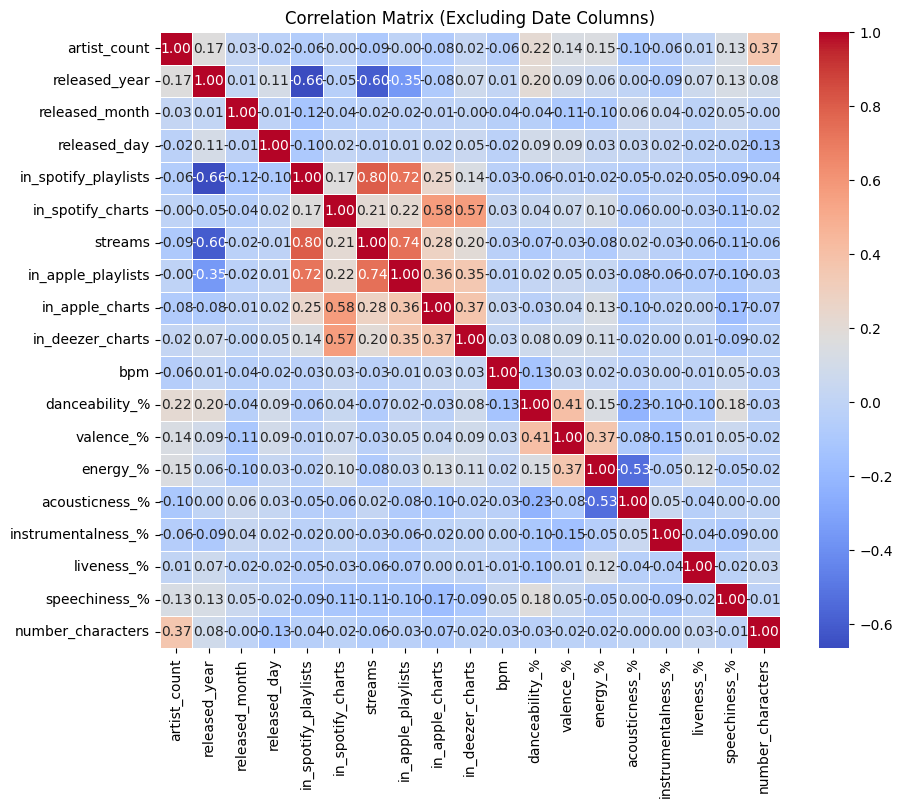

In [55]:
# Exclude the date columns
date_columns = ['released_year', 'released_month', 'released_day']

# Select only the numerical columns excluding the date ones
numerical_columns = df_filtered.select_dtypes(include=['number']).columns.tolist()

# Remove the date columns from the list of numerical columns
numerical_columns = [col for col in numerical_columns if col not in date_columns]

# Check if 'streams' is in the numerical columns list
if 'streams' not in numerical_columns:
    print("'streams' is not in the list of numerical columns. Checking the column type...")

    # Ensure 'streams' is numeric (convert if necessary)
    df_filtered['streams'] = pd.to_numeric(df_filtered['streams'], errors='coerce')  # Convert to numeric and handle errors

    # Re-check the list of numerical columns
    numerical_columns = df_filtered.select_dtypes(include=['number']).columns.tolist()
    if 'streams' not in numerical_columns:
        print("There was an issue with the 'streams' column. It might contain non-numeric values.")
    else:
        print("'streams' is now part of the numerical columns.")

# Calculate the correlation matrix
correlation_matrix = df_filtered[numerical_columns].corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Matrix (Excluding Date Columns)")
plt.show()



### Step 6: Explore Additional Insights

#### 6.1. Distribution of Streams

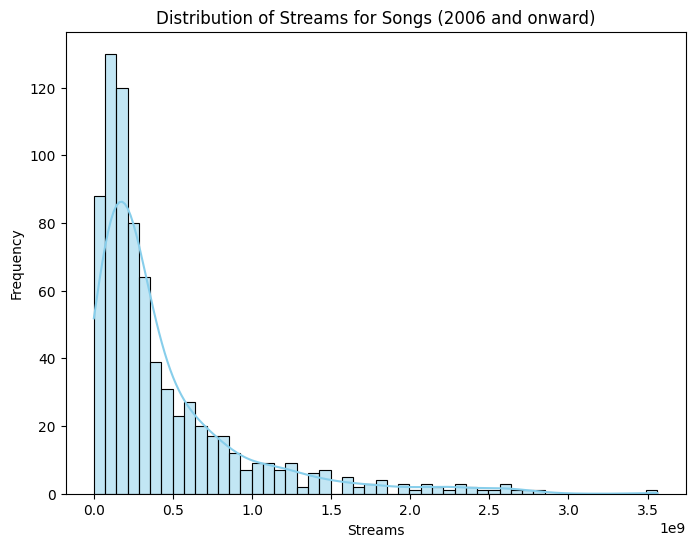

In [56]:
plt.figure(figsize=(8, 6))
sns.histplot(df_filtered['streams'], bins=50, kde=True, color='skyblue')
plt.title("Distribution of Streams for Songs (2006 and onward)")
plt.xlabel("Streams")
plt.ylabel("Frequency")
plt.show()


#### 6.2. Relationship Between Streams and Playlist Inclusion


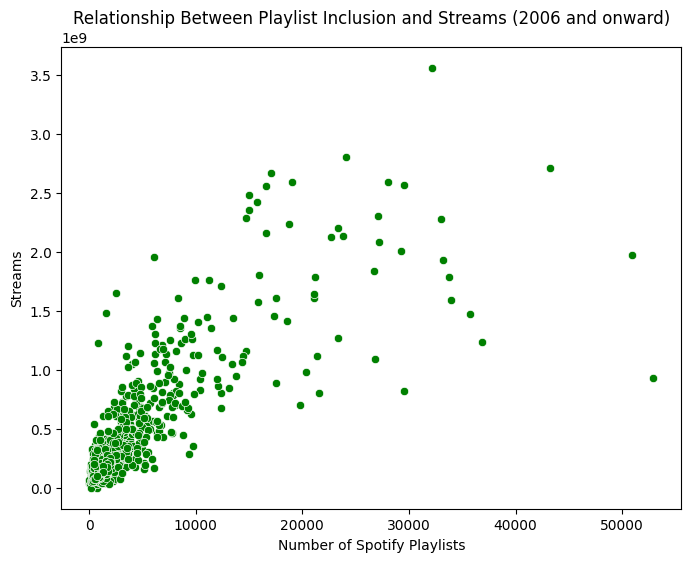

In [57]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_filtered, x='in_spotify_playlists', y='streams', color='green')
plt.title("Relationship Between Playlist Inclusion and Streams (2006 and onward)")
plt.xlabel("Number of Spotify Playlists")
plt.ylabel("Streams")
plt.show()


#### 6.3. Average Streams by Release Year

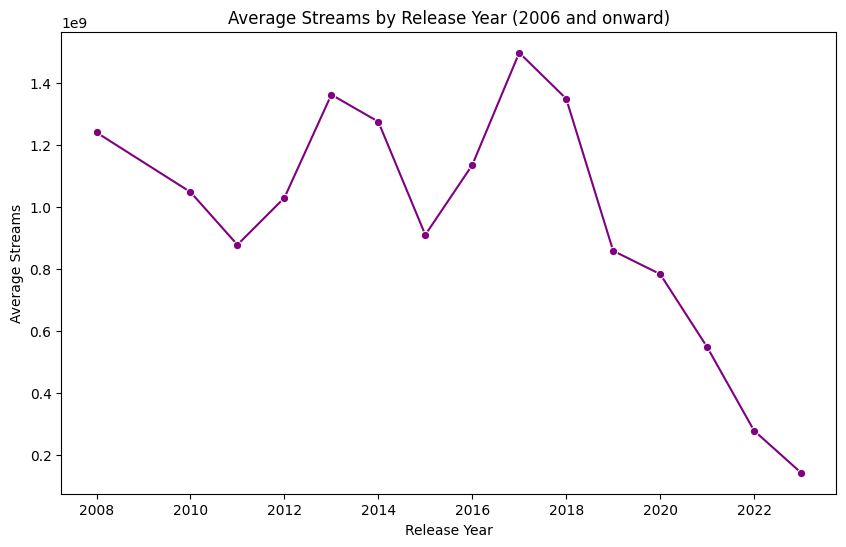

In [58]:
# Group by release year and calculate the average streams
average_streams_by_year = df_filtered.groupby('released_year')['streams'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(data=average_streams_by_year, x='released_year', y='streams', marker='o', color='purple')
plt.title("Average Streams by Release Year (2006 and onward)")
plt.xlabel("Release Year")
plt.ylabel("Average Streams")
plt.show()


### Step 7: Additional Exploration: Most Streamed Songs

In [59]:
# Sort the dataset by streams in descending order and show the top 10 songs
top_10_songs = df_filtered[['track_name', 'streams']].sort_values(by='streams', ascending=False).head(10)

print("Top 10 most streamed songs:")
print(top_10_songs)

Top 10 most streamed songs:
                                        track_name     streams
179                                   Shape of You  3562543890
41   Sunflower - Spider-Man: Into the Spider-Verse  2808096550
162                                      One Dance  2713922350
84                       STAY (with Justin Bieber)  2665343922
140                                       Believer  2594040133
725                                         Closer  2591224264
48                                         Starboy  2565529693
138                                        Perfect  2559529074
693                                      Seï¿½ï¿½o  2484812918
324                           Say You Won't Let Go  2420461338


In [60]:
# Save the cleaned dataset to a new CSV file
df_filtered.to_csv('data/spotify_cleaned.csv', index=False)

## 2. Creating the model

The objective of this part is to create a model that predicts if a song will be succesfull (the number of streams) given the characteristics (musical and non musical) of the song. 

### Step 1: Encode the categorical lables

In [61]:
from sklearn.preprocessing import LabelEncoder

# Create and fit the LabelEncoders for the categorical columns
le_song_name = LabelEncoder()
df_filtered['track_name'] = le_song_name.fit_transform(df_filtered['track_name'])

le_artists = LabelEncoder()
df_filtered['artist_name'] = le_artists.fit_transform(df_filtered['artist_name'])

le_key = LabelEncoder()
df_filtered['key'] = le_key.fit_transform(df_filtered['key'])


le_mode = LabelEncoder()
df_filtered['mode'] = le_mode.fit_transform(df_filtered['mode'])
df_filtered.head()


C:\Users\Bruno\AppData\Local\Temp\ipykernel_26060\587567981.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['track_name'] = le_song_name.fit_transform(df_filtered['track_name'])
C:\Users\Bruno\AppData\Local\Temp\ipykernel_26060\587567981.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['artist_name'] = le_artists.fit_transform(df_filtered['artist_name'])
C:\Users\Bruno\AppData\Local\Temp\ipykernel_26060\587567981.py:11: SettingWithCopyWarning: 
A value is trying to be set on a

,track_name,artist_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,number_characters
0,558,260,2,2023,7,14,553,147,141381703,43,...,2,0,80,89,83,31,0,8,4,35
1,322,326,1,2023,3,23,1474,48,133716286,48,...,3,0,71,61,74,7,0,10,4,4
2,752,351,1,2023,6,30,1397,113,140003974,94,...,7,0,51,32,53,17,0,31,6,7
3,141,455,1,2019,8,23,7858,100,800840817,116,...,0,0,55,58,72,11,0,11,15,12
4,699,34,1,2023,5,18,3133,50,303236322,84,...,0,1,65,23,80,14,63,11,6,14


### Step 2: Normalize numerical values

In [62]:
# # Normalize non-labeled-encoded numerical columns
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Normalize the numerical columns (excluding the target column 'streams')
df_filtered_to_see_error = df_filtered.copy()

# Exclude streams (this should be used for the model but the errors should be calculated normalizing streams)
numerical_columns = [col for col in numerical_columns if col != 'streams']

# Create a df_filtered wihout excluding streams
df_filtered[numerical_columns] = scaler.fit_transform(df_filtered[numerical_columns])
df_filtered_to_see_error[numerical_columns] = scaler.fit_transform(df_filtered_to_see_error[numerical_columns])


C:\Users\Bruno\AppData\Local\Temp\ipykernel_26060\698102188.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered[numerical_columns] = scaler.fit_transform(df_filtered[numerical_columns])


### Step 3: Select features

In [63]:
from sklearn.model_selection import train_test_split

# Select the relevant features and target variable (all except charting data)
X = df_filtered[['track_name','artist_name', 'artist_count', 'released_year','released_month', 'released_day', 'bpm', 'key', 'mode', 'danceability_%', 'valence_%' ,'energy_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%' ]]  # Features
y = df_filtered['streams']  # Target variable

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verify the length of all datasets
print(f"Training feature set length: {len(X_train)}")
print(f"Testing feature set length: {len(X_test)}")
print(f"Training target set length: {len(y_train)}")
print(f"Testing target set length: {len(y_test)}")

Training feature set length: 609
Testing feature set length: 153
Training target set length: 609
Testing target set length: 153


###  Step 4: Try different models

In [64]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder


model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (Linear Regressor): {mse}")

Mean Squared Error (Linear Regressor): 1.343338889104577e+17


In [65]:
from sklearn.ensemble import RandomForestRegressor

# Create the RandomForest Regressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model on the training data
rf_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_rf = rf_model.predict(X_test)

# Calculate the Mean Squared Error (MSE)
mse_rf = mean_squared_error(y_test, y_pred_rf)

# Print the MSE for Random Forest
print(f"Mean Squared Error (Random Forest): {mse_rf}")

Mean Squared Error (Random Forest): 1.1367220264232235e+17


In [66]:
from xgboost import XGBRegressor

xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
print(f"Mean Squared Error (XGBoost): {mse_xgb}")

Mean Squared Error (XGBoost): 1.1700964416235694e+17


In [67]:
from sklearn.svm import SVR

svr_model = SVR(kernel='rbf', C=1.0)
svr_model.fit(X_train, y_train)
y_pred_svr = svr_model.predict(X_test)
mse_svr = mean_squared_error(y_test, y_pred_svr)
print(f"Mean Squared Error (SVR): {mse_svr}")

Mean Squared Error (SVR): 2.4368002544585654e+17


In [68]:
from sklearn.neural_network import MLPRegressor

nn_model = MLPRegressor(hidden_layer_sizes=(100,), max_iter=500, random_state=42)
nn_model.fit(X_train, y_train)
y_pred_nn = nn_model.predict(X_test)
mse_nn = mean_squared_error(y_test, y_pred_nn)
print(f"Mean Squared Error (Neural Network): {mse_nn}")

Mean Squared Error (Neural Network): 3.861461550079305e+17


c:\Users\Bruno\anaconda3\envs\ICX\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


In [69]:
from sklearn.linear_model import Ridge

ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
print(f"Mean Squared Error (Ridge Regression): {mse_ridge}")

Mean Squared Error (Ridge Regression): 1.3429537277908341e+17


### Step 6: Cross-validation for all models

In [70]:
from sklearn.model_selection import cross_val_score

# Define models
models = {
    "Linear Regression": model,
    "Random Forest": rf_model,
    "XGBoost": XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42),
    "Ridge Regression": Ridge(alpha=1.0),
    "SVR": SVR(kernel='rbf', C=1.0),
    "Neural Network": MLPRegressor(hidden_layer_sizes=(100,), max_iter=500, random_state=42)
}

# Evaluate models
for name, m in models.items():
    scores = cross_val_score(m, X, y, scoring='neg_mean_squared_error', cv=5)
    mse = -scores.mean()
    print(f"{name} Cross-Validated MSE: {mse}")

# Select the best model based on the lowest MSE
best_model = min(models, key=lambda x: -cross_val_score(models[x], X, y, scoring='neg_mean_squared_error', cv=5).mean())
print(f"Best Model: {best_model}")

Linear Regression Cross-Validated MSE: 1.715175965370394e+17
Random Forest Cross-Validated MSE: 1.6536458371017965e+17
XGBoost Cross-Validated MSE: 1.6318935075572486e+17
Ridge Regression Cross-Validated MSE: 1.715198034394466e+17
SVR Cross-Validated MSE: 3.0067108543632064e+17


c:\Users\Bruno\anaconda3\envs\ICX\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Bruno\anaconda3\envs\ICX\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Bruno\anaconda3\envs\ICX\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Bruno\anaconda3\envs\ICX\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Bruno\anaconda3\envs\ICX\Li

Neural Network Cross-Validated MSE: 4.522914372787401e+17


c:\Users\Bruno\anaconda3\envs\ICX\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Bruno\anaconda3\envs\ICX\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Bruno\anaconda3\envs\ICX\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Bruno\anaconda3\envs\ICX\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Best Model: XGBoost


c:\Users\Bruno\anaconda3\envs\ICX\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


The real error values are the following (calculated by normalizing streams as well)
- Mean Squared Error (Linear Regressor): 0.5208175629742154
- Mean Squared Error (Random Forest): 0.43883440642074556
- Mean Squared Error (XGBoost): 0.45365087458736025
- Mean Squared Error (SVR): 0.9240434831090322
- Mean Squared Error (Neural Network): 0.725040679930679
- Mean Squared Error (Ridge Regression): 0.5206682344775846

### Step 7: Plot the predicted vs actual values for all models

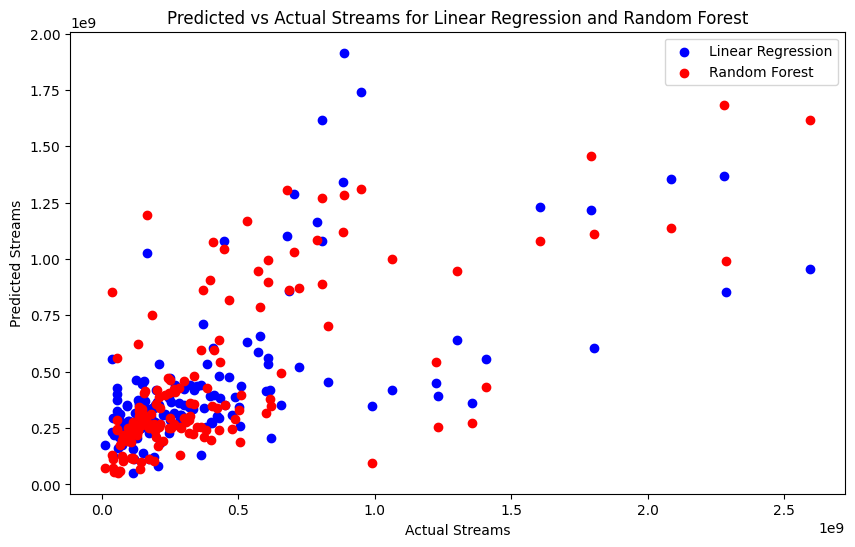

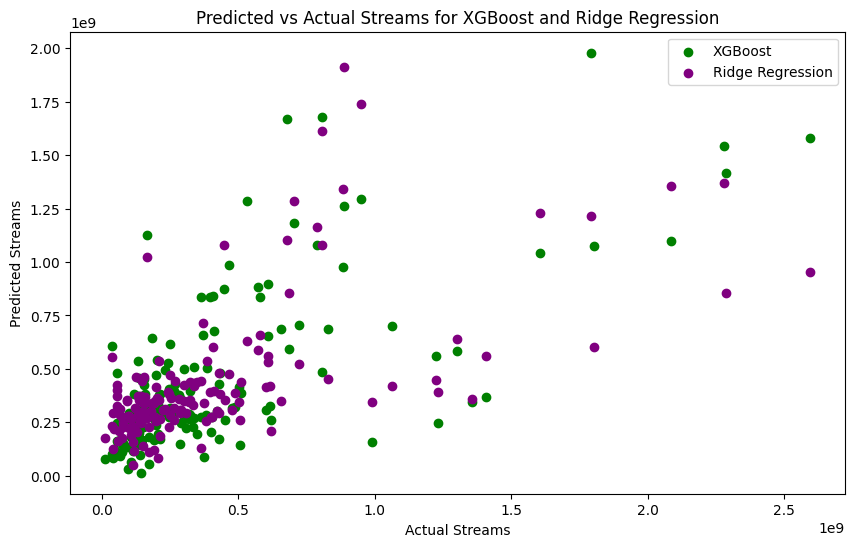

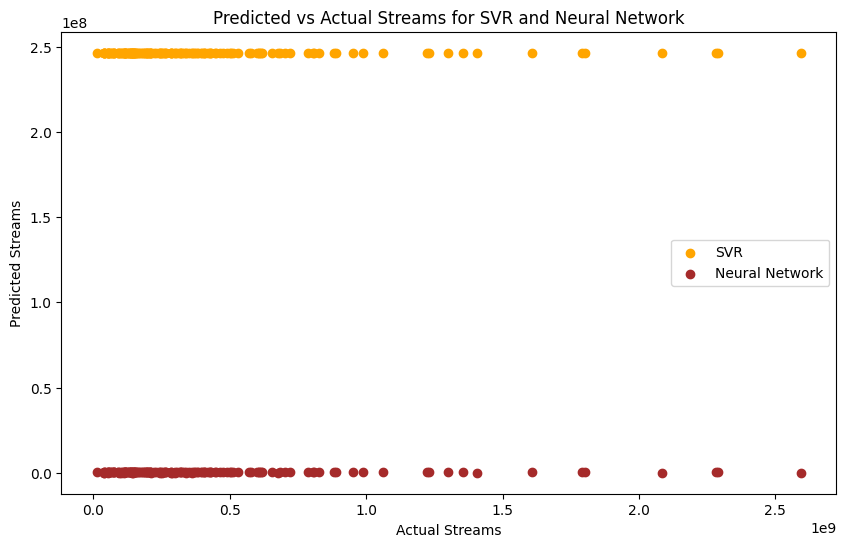

In [71]:
import matplotlib.pyplot as plt

# Plot the predicted vs actual values for Linear Regression and Random Forest
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Linear Regression')
plt.scatter(y_test, y_pred_rf, color='red', label='Random Forest')
plt.xlabel('Actual Streams')
plt.ylabel('Predicted Streams')
plt.title('Predicted vs Actual Streams for Linear Regression and Random Forest')
plt.legend()
plt.show()

# Plot the predicted vs actual values for XGBoost and Ridge Regression
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_xgb, color='green', label='XGBoost')
plt.scatter(y_test, y_pred_ridge, color='purple', label='Ridge Regression')
plt.xlabel('Actual Streams')
plt.ylabel('Predicted Streams')
plt.title('Predicted vs Actual Streams for XGBoost and Ridge Regression')
plt.legend()
plt.show()

# Plot the predicted vs actual values for SVR and Neural Network
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_svr, color='orange', label='SVR')
plt.scatter(y_test, y_pred_nn, color='brown', label='Neural Network')
plt.xlabel('Actual Streams')
plt.ylabel('Predicted Streams')
plt.title('Predicted vs Actual Streams for SVR and Neural Network')
plt.legend()
plt.show()

### Step 8: Plot the residuals of each model

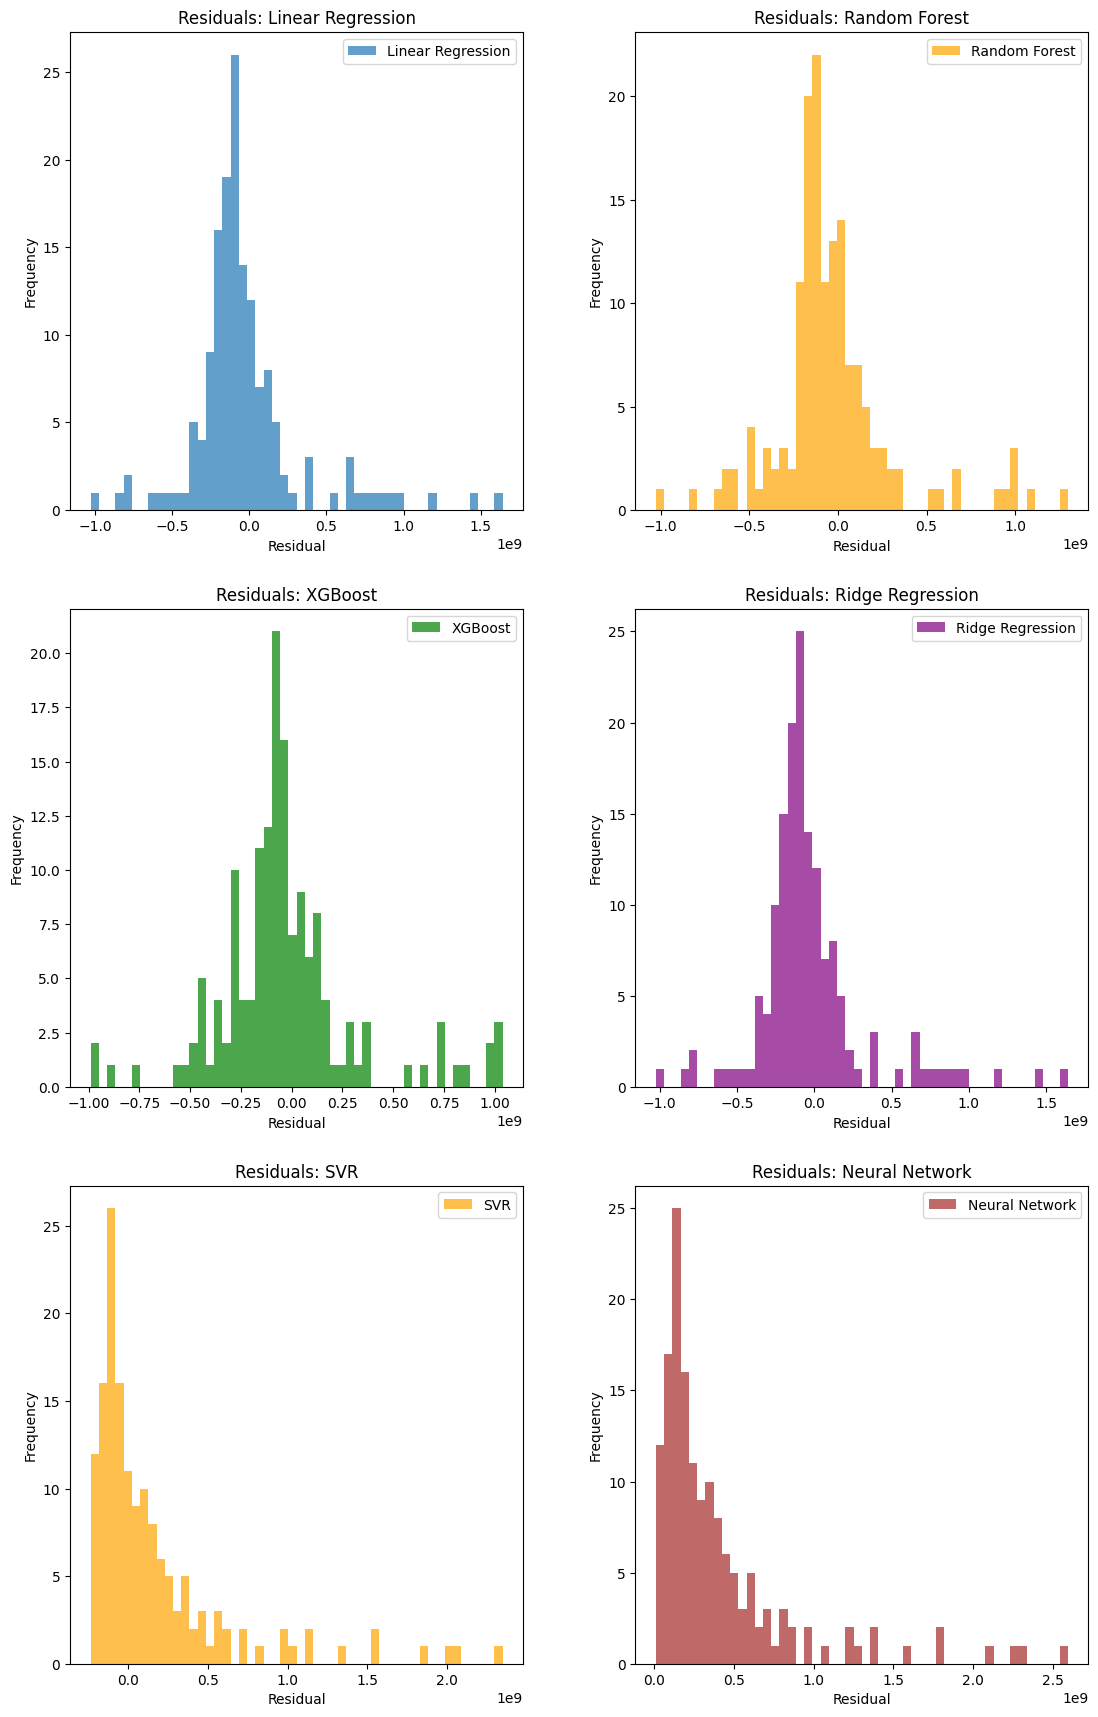

In [72]:
import matplotlib.pyplot as plt

# Create a 3x2 grid for the plots
fig, axes = plt.subplots(3, 2, figsize=(12, 18))  # Adjust size as needed
fig.tight_layout(pad=5.0)  # Add space between plots

# Linear Regression Residuals
axes[0, 0].hist(y_test - y_pred, bins=50, alpha=0.7, label='Linear Regression')
axes[0, 0].set_title('Residuals: Linear Regression')
axes[0, 0].set_xlabel('Residual')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].legend()

# Random Forest Residuals
axes[0, 1].hist(y_test - y_pred_rf, bins=50, alpha=0.7, label='Random Forest', color='orange')
axes[0, 1].set_title('Residuals: Random Forest')
axes[0, 1].set_xlabel('Residual')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].legend()

# XGBoost Residuals
axes[1, 0].hist(y_test - y_pred_xgb, bins=50, alpha=0.7, label='XGBoost', color='green')
axes[1, 0].set_title('Residuals: XGBoost')
axes[1, 0].set_xlabel('Residual')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].legend()

# Ridge Regression Residuals
axes[1, 1].hist(y_test - y_pred_ridge, bins=50, alpha=0.7, label='Ridge Regression', color='purple')
axes[1, 1].set_title('Residuals: Ridge Regression')
axes[1, 1].set_xlabel('Residual')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].legend()

# SVR Residuals
axes[2, 0].hist(y_test - y_pred_svr, bins=50, alpha=0.7, label='SVR', color='orange')
axes[2, 0].set_title('Residuals: SVR')
axes[2, 0].set_xlabel('Residual')
axes[2, 0].set_ylabel('Frequency')
axes[2, 0].legend()

# Neural Network Residuals
axes[2, 1].hist(y_test - y_pred_nn, bins=50, alpha=0.7, label='Neural Network', color='brown')
axes[2, 1].set_title('Residuals: Neural Network')
axes[2, 1].set_xlabel('Residual')
axes[2, 1].set_ylabel('Frequency')
axes[2, 1].legend()

# Show the entire grid of plots
plt.show()

### Step 9: Feature Explainability

C:\Users\Bruno\AppData\Local\Temp\ipykernel_26060\3391105681.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feature_importances, x='importance', y='feature', palette='viridis')


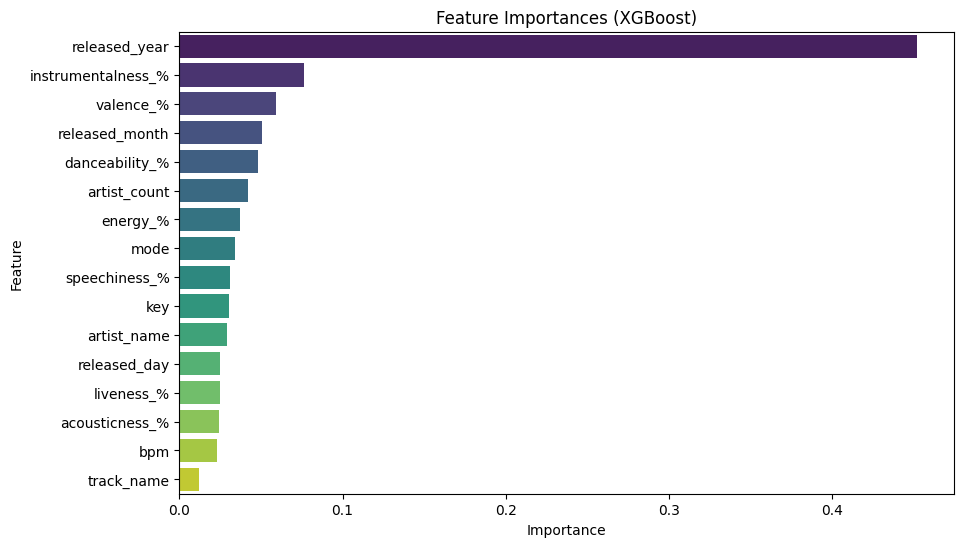

In [73]:
# Calculate the feature importances for XGBoost
importances = xgb_model.feature_importances_

# Create a DataFrame to display the feature importances
feature_importances = pd.DataFrame({'feature': X.columns, 'importance': importances})

# Sort the values by importance
feature_importances = feature_importances.sort_values('importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importances, x='importance', y='feature', palette='viridis')
plt.title('Feature Importances (XGBoost)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

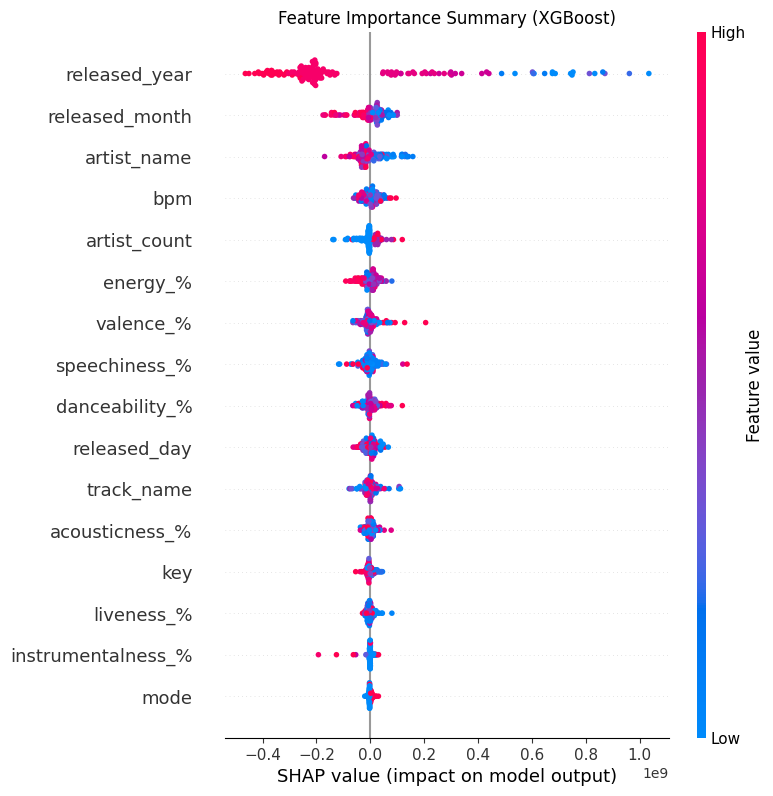

In [74]:
import shap

# Create SHAP explainer for XGBoost
explainer = shap.Explainer(xgb_model, X_test)

# Calculate SHAP values
shap_values = explainer(X_test)

shap.summary_plot(shap_values, X_test, show=False)
plt.title("Feature Importance Summary (XGBoost)")
plt.show()

In [75]:
# Save the XGBoost model
import pickle

with open('model/xgboost_model.pkl', 'wb') as file:
    pickle.dump(xgb_model, file)

# Save the dataset
df_filtered.to_csv('data/spotify_inference.csv', index=False)

# Save the LabelEncoders
with open('model/label_encoders.pkl', 'wb') as file:
    pickle.dump(le_song_name, file)
    pickle.dump(le_artists, file)
    pickle.dump(le_key, file)
    pickle.dump(le_mode, file)

# Save the StandardScaler
with open('model/standard_scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)

# Save the SHAP explainer
with open('model/shap_explainer.pkl', 'wb') as file:
    pickle.dump(explainer, file)

In [76]:
# Display the head
df_filtered.head()

,track_name,artist_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,number_characters
0,558,260,0.471364,0.736341,0.256888,-0.000286,-0.548576,7.157643,141381703,-0.189841,...,2,0,0.849387,1.634333,1.188028,0.200272,-0.188416,-0.755013,-0.651300,1.412891
1,322,326,-0.658131,0.736341,-0.886170,0.981464,-0.402492,1.907735,133716286,-0.122167,...,3,0,0.216362,0.432163,0.614422,-0.760529,-0.188416,-0.606390,-0.651300,-0.946455
2,752,351,-0.658131,0.736341,-0.028876,1.745048,-0.414705,5.354644,140003974,0.500428,...,7,0,-1.190360,-0.812941,-0.723991,-0.360195,-0.188416,0.954152,-0.457815,-0.718131
3,141,455,-0.658131,-0.696844,0.542653,0.981464,0.610101,4.665262,800840817,0.798191,...,0,0,-0.909016,0.303360,0.486954,-0.600396,-0.188416,-0.532078,0.412871,-0.337592
4,699,34,-0.658131,0.736341,-0.314641,0.436047,-0.139351,2.013794,303236322,0.365081,...,0,1,-0.205655,-1.199352,0.996826,-0.480296,6.967522,-0.532078,-0.457815,-0.185376
